In [677]:
# Imports
import numpy
numpy.set_printoptions(threshold=1000)

import matplotlib.pyplot as plt

import scipy.io

In [678]:
# Declarations

# Paths
SUBJECT_A_TRAIN_PATH = '../dataset/Matlab Format/Subject_A_Train.mat'
SUBJECT_A_TEST_PATH = '../dataset/Matlab Format/Subject_A_Test.mat'
SUBJECT_B_TRAIN_PATH = '../dataset/Matlab Format/Subject_B_Train.mat'
SUBJECT_B_TEST_PATH = '../dataset/Matlab Format/Subject_A_Test.mat'

EPOCHS = 85
CHANNELS = 64
EXTRACTED_CHANNEL = 51 #Pz
INTENSIFICATIONS = 12
WINDOW = 240

MATRIX = numpy.array(['A', 'B', 'C', 'D', 'E', 'F', \
                      'G', 'H', 'I', 'J', 'K', 'L', \
                      'M', 'N', 'O', 'P', 'Q', 'R', \
                      'S', 'T', 'U', 'V', 'W', 'X', \
                      'Y', 'Z', '1', '2', '3', '4', \
                      '5', '6', '7', '8', '9', '_'])

In [679]:
# Loading
Subject_A_Train = scipy.io.loadmat(SUBJECT_A_TRAIN_PATH)
Subject_A_Test = scipy.io.loadmat(SUBJECT_A_TEST_PATH)
Subject_B_Train = scipy.io.loadmat(SUBJECT_B_TRAIN_PATH)
Subject_B_Test = scipy.io.loadmat(SUBJECT_B_TEST_PATH)

In [693]:
# Detection
Subject_A_Signal_Train = numpy.array(Subject_A_Train.get('Signal'));
Subject_A_TargetChar_Train = numpy.array(Subject_A_Train.get('TargetChar'));
Subject_A_Flashing_Train = numpy.array(Subject_A_Train.get('Flashing'));
Subject_A_StimulusCode_Train = numpy.array(Subject_A_Train.get('StimulusCode'));
Subject_A_StimulusType_Train = numpy.array(Subject_A_Train.get('StimulusType'));

print('Subject A Signal Train:', Subject_A_Signal_Train.shape)
print('Subject A TargetChar Train:', Subject_A_TargetChar_Train.shape)
print('Subject A Flashing Train:', Subject_A_Flashing_Train.shape)
print('Subject A StimulusCode Train:', Subject_A_StimulusCode_Train.shape)
print('Subject A StimulusType Train:', Subject_A_StimulusType_Train.shape)

Subject A Signal Train: (85, 7794, 64)
Subject A TargetChar Train: (1,)
Subject A Flashing Train: (85, 7794)
Subject A StimulusCode Train: (85, 7794)
Subject A StimulusType Train: (85, 7794)


In [694]:
sum_average_responses_Success = numpy.zeros((WINDOW, CHANNELS))
sum_average_responses_Fail = numpy.zeros((WINDOW, CHANNELS))

# Looping Through Characters (85 Character)
for epoch in range(1, Subject_A_Signal_Train.shape[0]):
    
    # Looping Through Signals (7794 Signal)
    row_column_count = numpy.zeros(12)
    responses = numpy.zeros((12, 15, WINDOW, CHANNELS))
    for n in range(1, Subject_A_Signal_Train.shape[1]):
        if Subject_A_Flashing_Train[epoch, n] == 0 and Subject_A_Flashing_Train[epoch, n-1] == 1:
            row_column = Subject_A_StimulusCode_Train[epoch, n-1]
            responses[int(row_column)-1, int(row_column_count[int(row_column)-1])-1] = Subject_A_Signal_Train[epoch, n-24:n+WINDOW-24]
            row_column_count[int(row_column)-1] += 1
    
    # Getting Average Over The 15 Repeatition
    average_responses = numpy.mean(responses, axis = 1)
    
    # Getting Index Of Chosen Character
    index = numpy.where(MATRIX == Subject_A_TargetChar_Train[0][epoch])[0][0]
    chosen_column = index % 6
    chosen_row = int((index / 6) % 6) + 6
    
    
    for row_column in range(12):
        if row_column == chosen_row or row_column == chosen_column:
            sum_average_responses_Success += average_responses[row_column]
        else:
            sum_average_responses_Fail += average_responses[row_column]

average_responses_Success = numpy.zeros((WINDOW, CHANNELS))
average_responses_Fail = numpy.zeros((WINDOW, CHANNELS))

average_responses_Success = sum_average_responses_Success / (Subject_A_Signal_Train.shape[0] * 2)
average_responses_Fail = sum_average_responses_Fail / (Subject_A_Signal_Train.shape[0] * 10)

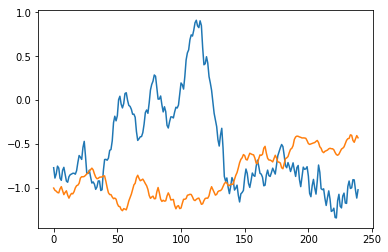

In [695]:
# Plotting Average Over All Channels
plt.plot(numpy.mean(average_responses_Success, axis = 1))
plt.plot(numpy.mean(average_responses_Fail, axis = 1))